In [24]:
#Importation des librairies utilisées
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
#Importation de dataset 
dataset = pd.read_excel('ENB2012_data.xlsx')
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [26]:
#Supression de Y1
data = dataset.drop(columns=['Y1'])
#Renommer Y2 --> Y
data = data.rename(columns={'Y2':'Y'})
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [27]:
#Le nombre des individus
data.shape

(768, 9)

In [28]:
#Informations de data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y       768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [29]:
#Tableau statistique
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


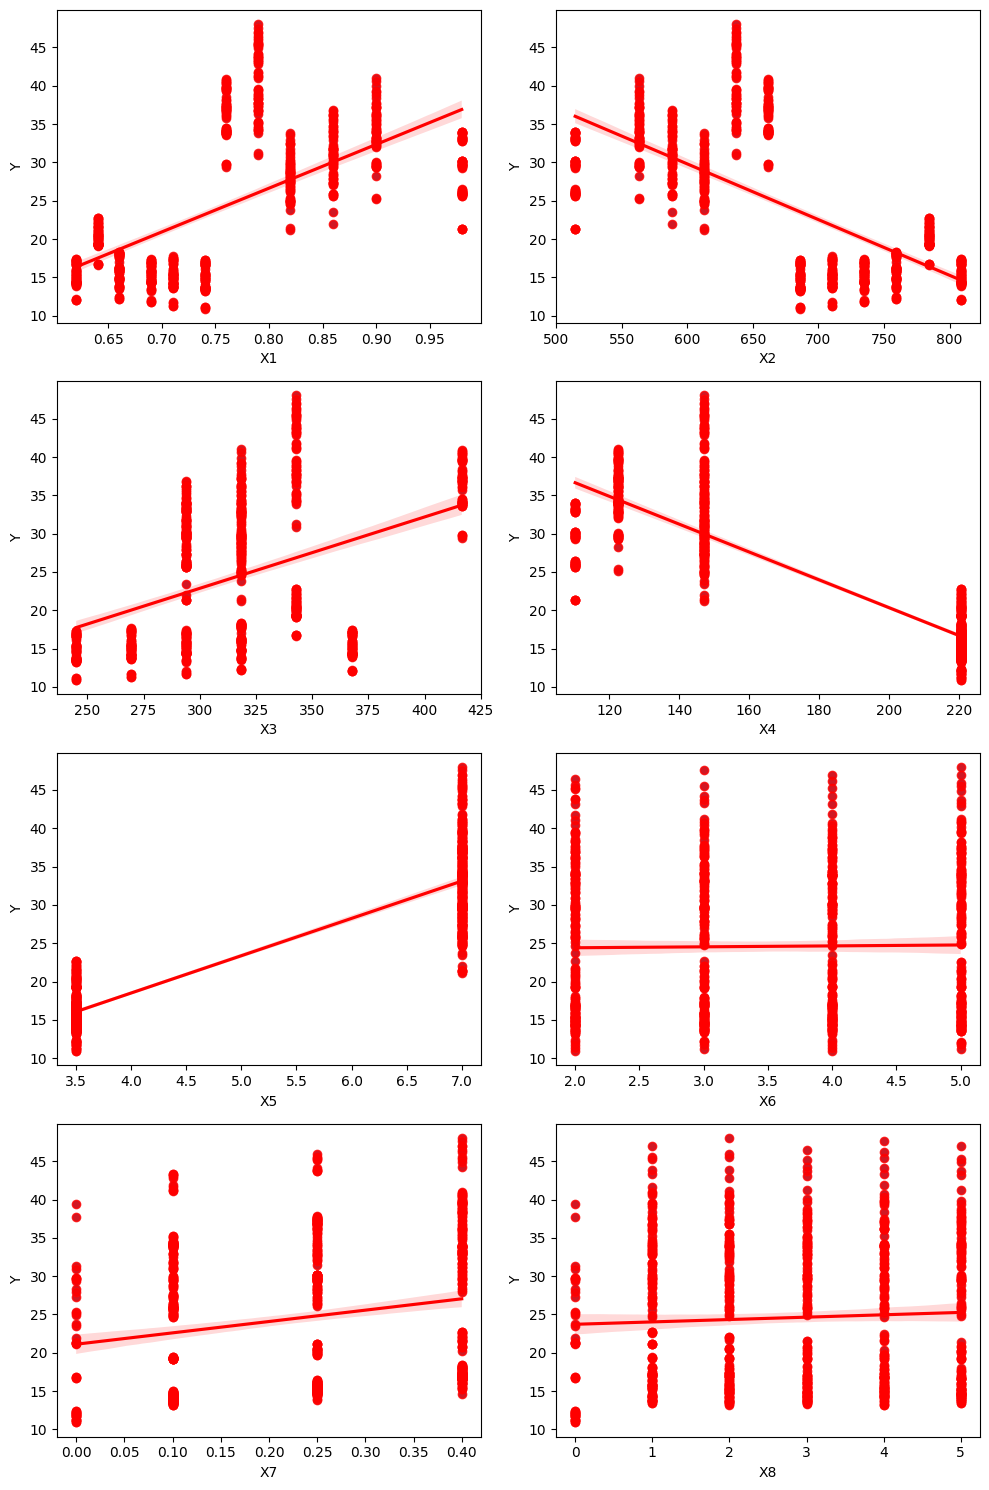

In [30]:
# Liste des variables à visualiser avec Y
variables = ['X1', 'X2', 'X3', 'X4','X5','X6','X7','X8']

#Graphe 
fig, axes = plt.subplots(4,2,figsize=(10,15))
axes = axes.flatten()

for i , var in enumerate(variables):
        sns.scatterplot(x=data[var],y=data['Y'],ax=axes[i])
        sns.regplot(x=data[var],y=data['Y'],ax=axes[i],color='red')

plt.tight_layout()
plt.show()

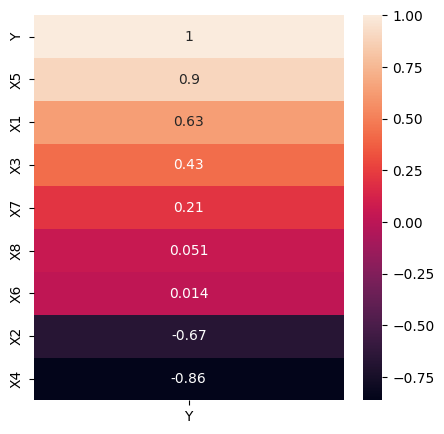

In [31]:
#Correlation 
corr_matrix = data.corr()
heatmap_matrix = corr_matrix[['Y']].sort_values(by='Y',ascending=False)
plt.figure(figsize=(5,5))
sns.heatmap(heatmap_matrix,annot=True)
plt.savefig("heatmap" , dpi=300, bbox_inches='tight')
plt.show()

In [32]:
X = data.drop(columns=['Y']) 
y = data['Y']

In [33]:
#Colonnes categorielles
cat_cols = ['X6', 'X8'] 
#Colonnes numerique
num_cols = [col for col in X.columns if col not in cat_cols] 

In [34]:
#Transformation
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ])

In [35]:
#Repartition des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(f'taille de X_train : {X_train.shape}, \ntaille de y_train : {y_train.shape},')
print(f'taille de X_test : {X_test.shape}, \ntaille de y_test : {y_test.shape},')

taille de X_train : (614, 8), 
taille de y_train : (614,),
taille de X_test : (154, 8), 
taille de y_test : (154,),


In [37]:
#Encodage de X_train et X_test
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

In [38]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [39]:
#Prediction de Y
y_pred = model.predict(X_test_encoded)
y_pred

array([19.96552957, 17.31372302, 32.21135352, 36.37958996, 16.9176374 ,
       31.58250259, 27.74167961, 30.3555558 , 19.69127662, 30.50591918,
       19.65667446, 36.08072276, 30.46248805, 11.92796602, 19.38862898,
       38.36488828, 37.37962919, 14.09868425, 18.02864894, 35.49468018,
       35.72246583, 36.85768945, 14.96755294, 32.64225918, 14.74691916,
       32.0562166 , 34.14757975, 35.76333069, 17.66344301, 17.97856082,
       12.91322511, 14.9819236 , 17.0019334 , 33.77009924, 32.84288708,
       30.03721934, 32.42425429, 32.48368575, 34.41528586, 13.55807637,
       29.63800282, 14.68472683, 10.47361789, 33.99353749, 10.55563176,
       10.83281922, 12.24229579, 13.29037026, 32.04117091, 32.34743705,
       33.97554384, 17.01107538, 17.45115676, 34.71095766, 15.64246367,
       15.15750989, 14.35501616, 33.14911513, 40.13639   , 38.19285238,
       17.66081595, 19.73834896, 17.05194024, 31.12128151, 29.99720415,
       32.68312405, 32.32392272, 15.2858894 , 15.8664312 , 14.18

In [21]:
#Evaluation de model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [40]:
print(f"R2 : {np.round(r2*100,2)}%")
print(f"MSE : {np.round(mse)}")
print(f"RMSE : {np.round(rmse)}")
print(f"MAE : {np.round(mae)}")

n = X_test_encoded.shape[0]
p = X_test_encoded.shape[1]
r2_ajoute = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"R² Ajusté: {np.round(r2_ajoute*100,2)}%") 

R2 : 89.5%
MSE : 10.0
RMSE : 3.0
MAE : 2.0
R² Ajusté: 88.44%
